In [1]:
import keras as k
from keras.datasets import mnist

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

/usr/lib/python2.7/dist-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# shape data for NN
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

# convert and standardize data for NN
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#X_train /= 255
#X_test /= 255


In [3]:
# categories for NN output
num_category = 10
y_train = k.utils.to_categorical(y_train, num_category)
y_test = k.utils.to_categorical(y_test, num_category)


In [4]:
# build NN
model = k.Sequential()

# convolutional layer w/ rectified linear unit activation
model.add(k.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
# 32 convolution filters used, each of size 3x3

# again
model.add(k.layers.Conv2D(64, (3,3), activation='relu'))
# 64 convolution filters used, each of size 3x3

# choose best features via pooling
model.add(k.layers.MaxPooling2D(pool_size=(2,2)))

# randomly turn neurons on/off to improve convergence
model.add(k.layers.Dropout(0,25))

# flatten since too many dimensions, we only want classification output
model.add(k.layers.Flatten())

# fully connected to get all relevant data
model.add(k.layers.Dense(128, activation='relu'))

# one more for convergence's sake
model.add(k.layers.Dropout(0.5))

# output a softmax to squash the matrix into output probabilities
model.add(k.layers.Dense(num_category, activation='softmax'))

In [5]:
# compile model
# use categorical_crossentropy as we have multiple classes
model.compile(loss=k.losses.categorical_crossentropy, optimizer=k.optimizers.Adadelta(), metrics=['accuracy'])

In [6]:
# train & test model
batch_size = 128
num_epoch = 10
model_log = model.fit(X_train, y_train, batch_size=batch_size, epochs=num_epoch, verbose=1, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.9271 - acc: 0.8931 - val_loss: 0.0640 - val_acc: 0.9815
Epoch 2/10
60000/60000 [==============================] - 68s 1ms/step - loss: 0.0908 - acc: 0.9742 - val_loss: 0.0511 - val_acc: 0.9848
Epoch 3/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0625 - acc: 0.9818 - val_loss: 0.0420 - val_acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0509 - acc: 0.9854 - val_loss: 0.0491 - val_acc: 0.9856
Epoch 5/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0408 - acc: 0.9881 - val_loss: 0.0380 - val_acc: 0.9885
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0337 - acc: 0.9902 - val_loss: 0.0385 - val_acc: 0.9891
Epoch 7/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.0307 - acc: 0.9908 - val_loss: 0.0375 - val_acc

In [8]:
# evaluate model
score = model.evaluate(X_test, y_test, verbose=0)
print 'Test loss:', score[0]
print 'Test accuracy:', score[1]

Test loss: 0.0415432467832376
Test accuracy: 0.9914


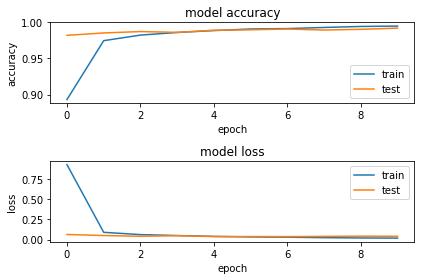

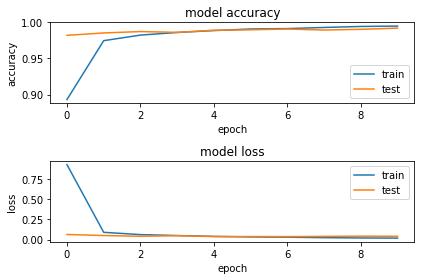

In [19]:
# plot model training
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model_log.history['acc'])
plt.plot(model_log.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [20]:
# save model to disk
model_digit_json = model.to_json()
with open("model_digit.json", "w") as json_file:
    json_file.write(model_digit_json)
model.save_weights("model_digit.h5")